## Ray Tracer Suite.

Still getting the hang of this whole C++ notebook thing. To start off, here's an image class, a decimation function to show that images can be manipulated, and an imported photo.

ImageMagick is installed, but it looks like actually calling it requires some sort of call to ImageMagick++-config which I can't find details for online. Instead, I'm using jpeglib, a built-in jpeg manipulator for C++. 

The C++ kernel is from Miniconda, and its libraries are located at /home/f0031qg/miniconda3/include.

I've tried out:
- CImg
- ImageMagick
- GraphicsMagick

For more details on nbextensions, see here:
- https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html

For a video introduction:
- https://www.youtube.com/watch?v=UzfYG8GdB3I

To edit jupyter settings, run:
- cat /home/f0031qg/.jupyter/jupyter_notebook_config.py

In [1]:
#include "list_of_includables.h"

In [2]:
hittable_list random_scene() {
    hittable_list world;
    
    auto checker = std::make_shared<checker_texture>(color(0.2, 0.3, 0.1), color(0.9, 0.9, 0.9));
    world.add(std::make_shared<sphere>(point3(0,-1000,0), 1000, std::make_shared<lambertian>(checker)));

    int bound = 7;
    for (int a = -bound; a < bound; a++) {
        for (int b = -bound; b < bound; b++) {
            auto choose_mat = random_double();
            point3 center(a + 0.9*random_double(), 0.2, b + 0.9*random_double());

            if ((center - point3(4, 0.2, 0)).length() > 0.9) {
                if (choose_mat < 0.8) {
                    // diffuse
                    auto albedo = color::random() * color::random();
                    std::shared_ptr<lambertian> lambert_mat = std::make_shared<lambertian>(albedo);
                    auto center2 = center + vec3(0, random_double(0,.5), 0);
                    world.add(std::make_shared<moving_sphere>(center, center2, 0.0, 1.0, 0.2, lambert_mat));
                } else if (choose_mat < 0.95) {
                    // metal
                    auto albedo = color::random(0.5, 1);
                    auto fuzz = random_double(0, 0.5);
                    std::shared_ptr<metal> metal_mat = std::make_shared<metal>(albedo, fuzz);
                    world.add(std::make_shared<sphere>(center, 0.2, metal_mat));
                } else {
                    // glass
                    std::shared_ptr<dielectric> dia_mat = std::make_shared<dielectric>(1.5);
                    world.add(std::make_shared<sphere>(center, 0.2, dia_mat));
                }
            }
        }
    }

    auto material1 = std::make_shared<dielectric>(1.5);
    world.add(std::make_shared<sphere>(point3(0, 1, 0), 1.0, material1));

    auto material2 = std::make_shared<lambertian>(color(0.4, 0.2, 0.1));
    world.add(std::make_shared<sphere>(point3(-4, 1, 0), 1.0, material2));

    auto material3 = std::make_shared<metal>(color(0.7, 0.6, 0.5), 0.0);
    world.add(std::make_shared<sphere>(point3(4, 1, 0), 1.0, material3));

    return world;
}

In [3]:
hittable_list two_spheres() {
    hittable_list objects;

    auto checker = std::make_shared<checker_texture>(color(0.2, 0.3, 0.1), color(0.9, 0.9, 0.9));

    objects.add(std::make_shared<sphere>(point3(0,-10, 0), 10, std::make_shared<lambertian>(checker)));
    objects.add(std::make_shared<sphere>(point3(0, 10, 0), 10, std::make_shared<lambertian>(checker)));

    return objects;
}

In [4]:
hittable_list two_perlin_spheres() {
    hittable_list objects;

    auto marbletext = std::make_shared<marble_texture>(4);
    auto turbtext = std::make_shared<turb_texture>(4);
    objects.add(std::make_shared<sphere>(point3(0,-1000,0), 1000, std::make_shared<lambertian>(marbletext)));
    objects.add(std::make_shared<sphere>(point3(0, 2, 0), 2, std::make_shared<lambertian>(turbtext)));

    auto test_bvh = std::make_shared<bvh_node>(objects, 0.0, 1.0);
    auto covering_hlist = hittable_list(test_bvh);
    
    return covering_hlist;
}

In [5]:
hittable_list earth() {
    auto earth_texture = std::make_shared<image_texture>("images/earthmap.ppm");
    auto earth_surface = std::make_shared<lambertian>(earth_texture);
    auto globe = std::make_shared<sphere>(point3(0,0,0), 2, earth_surface);

    return hittable_list(globe);
}

In [6]:
hittable_list simple_light() {
    hittable_list objects;

    auto mtext = std::make_shared<marble_texture>(4);
    objects.add(std::make_shared<sphere>(point3(0,-1000,0), 1000, std::make_shared<lambertian>(mtext)));
    objects.add(std::make_shared<sphere>(point3(0,2,0), 2, std::make_shared<lambertian>(mtext)));

    auto difflight = std::make_shared<diffuse_light>(color(4,4,4));
    objects.add(std::make_shared<xy_rect>(3, 5, 1, 3, -2, difflight));

    return objects;
}

In [7]:
hittable_list cornell_box() {
    hittable_list objects;

    auto red   = std::make_shared<lambertian>(color(.65, .05, .05));
    auto white = std::make_shared<lambertian>(color(.73, .73, .73));
    auto green = std::make_shared<lambertian>(color(.12, .45, .15));
    auto light = std::make_shared<diffuse_light>(color(15, 15, 15));

    objects.add(std::make_shared<yz_rect>(0, 555, 0, 555, 555, green));
    objects.add(std::make_shared<yz_rect>(0, 555, 0, 555, 0, red));
    objects.add(std::make_shared<xz_rect>(213, 343, 227, 332, 554, light));
    objects.add(std::make_shared<xz_rect>(0, 555, 0, 555, 0, white));
    objects.add(std::make_shared<xz_rect>(0, 555, 0, 555, 555, white));
    objects.add(std::make_shared<xy_rect>(0, 555, 0, 555, 555, white));
    
    std::shared_ptr<hittable> box1 = std::make_shared<box>(point3(0, 0, 0), point3(165, 330, 165), white);
    box1 = std::make_shared<rotate_y>(box1, 15);
    box1 = std::make_shared<translate>(box1, vec3(265,0,295));

    std::shared_ptr<hittable> box2 = std::make_shared<box>(point3(0,0,0), point3(165,165,165), white);
    box2 = std::make_shared<rotate_y>(box2, -18);
    box2 = std::make_shared<translate>(box2, vec3(130,0,65));
    
    objects.add(std::make_shared<constant_medium>(box1, 0.01, color(0,0,0)));
    objects.add(std::make_shared<constant_medium>(box2, 0.01, color(1,1,1)));
    
    return objects;
}

In [8]:
hittable_list final_scene() {
    hittable_list boxes1;
    auto ground = std::make_shared<lambertian>(color(0.48, 0.83, 0.53));

    const int boxes_per_side = 16;
    const float total_width = 2000.0;
    const float side_length = total_width / boxes_per_side;
    for (int i = 0; i < boxes_per_side; i++) {
        for (int j = 0; j < boxes_per_side; j++) {
            auto x0 = -(total_width/2) + i*side_length;
            auto z0 = -(total_width/2) + j*side_length;
            auto y0 = 0.0;
            auto x1 = x0 + side_length;
            auto y1 = random_double(1,101);
            auto z1 = z0 + side_length;

            boxes1.add(std::make_shared<box>(point3(x0,y0,z0), point3(x1,y1,z1), ground));
        }
    }

    hittable_list objects;

    objects.add(std::make_shared<bvh_node>(boxes1, 0, 1));

    auto light = std::make_shared<diffuse_light>(color(7, 7, 7));
    objects.add(std::make_shared<xz_rect>(123, 423, 147, 412, 554, light));

    auto center1 = point3(400, 400, 200);
    auto center2 = center1 + vec3(30,0,0);
    auto moving_sphere_material = std::make_shared<lambertian>(color(0.7, 0.3, 0.1));
    objects.add(std::make_shared<moving_sphere>(center1, center2, 0, 1, 50, moving_sphere_material));

    objects.add(std::make_shared<sphere>(point3(260, 150, 45), 50, std::make_shared<dielectric>(1.5)));
    objects.add(std::make_shared<sphere>(
        point3(0, 150, 145), 50, std::make_shared<metal>(color(0.8, 0.8, 0.9), 1.0)
    ));

    auto boundary = std::make_shared<sphere>(point3(360,150,145), 70, std::make_shared<dielectric>(1.5));
    objects.add(boundary);
    objects.add(std::make_shared<constant_medium>(boundary, 0.2, color(0.2, 0.4, 0.9)));
    boundary = std::make_shared<sphere>(point3(0, 0, 0), 5000, std::make_shared<dielectric>(1.5));
    objects.add(std::make_shared<constant_medium>(boundary, .0001, color(1,1,1)));

    auto emat = std::make_shared<lambertian>(std::make_shared<image_texture>("images/earthmap.ppm"));
    objects.add(std::make_shared<sphere>(point3(400,200,400), 100, emat));
    auto pertext = std::make_shared<noise_texture>(0.1);
    objects.add(std::make_shared<sphere>(point3(220,280,300), 80, std::make_shared<lambertian>(pertext)));

    hittable_list boxes2;
    auto white = std::make_shared<lambertian>(color(.73, .73, .73));
    int ns = 200;
    for (int j = 0; j < ns; j++) {
        boxes2.add(std::make_shared<sphere>(point3::random(0,165), 15, white));
    }

    objects.add(std::make_shared<translate>(
        std::make_shared<rotate_y>(
            std::make_shared<bvh_node>(boxes2, 0.0, 1.0), 15),
            vec3(-100,270,395)
        )
    );

    return objects;
}

In [9]:
im::image next_test(int choice) {
    
    // Image

    float aspect_ratio = 16.0 / 9.0;
    const float gamma = 2;
    int image_width = 600;
    int samples_per_pixel = 40;
    int max_depth = 20;

    // World

    point3 lookfrom;
    point3 lookat;
    auto vfov = 10.0;
    auto aperture = 0.0;
    color background(0,0,0);
    
    hittable_list world;

    switch (choice) {
        case 1:
            world = random_scene();
            background = color(0.70, 0.80, 1.00);
            lookfrom = point3(13,2,3);
            lookat = point3(0,0,0);
            vfov = 20.0;
            aperture = 0.1;
            image_width = 80;
            samples_per_pixel = 5;
            max_depth = 20;
            break;

        case 2:
            world = two_spheres();
            background = color(0.70, 0.80, 1.00);
            lookfrom = point3(13,2,3);
            lookat = point3(0,0,0);
            vfov = 20.0;
            image_width = 300;
            samples_per_pixel = 10;
            max_depth = 50;
            break;
            
        case 3:
            world = two_perlin_spheres();
            background = color(0.70, 0.80, 1.00);
            lookfrom = point3(13,2,3);
            lookat = point3(0,0,0);
            vfov = 20.0;
            image_width = 300;
            samples_per_pixel = 10;
            max_depth = 50;
            break;
            
        case 4:
            world = earth();
            background = color(0.70, 0.80, 1.00);
            lookfrom = point3(13,2,3);
            lookat = point3(0,0,0);
            vfov = 20.0;
            break;
        
        case 5:
            world = simple_light();
            background = color(0,0,0);
            samples_per_pixel = 100;
            lookfrom = point3(26,3,6);
            lookat = point3(0,2,0);
            vfov = 20.0;
            break;
            
        case 6:
            world = cornell_box();
            aspect_ratio = 1.0;
            image_width = 400;
            samples_per_pixel = 20;
            background = color(0,0,0);
            lookfrom = point3(278, 278, -800);
            lookat = point3(278, 278, 0);
            vfov = 40.0;
            break;
            
        default:
        case 7:
            world = final_scene();
            aspect_ratio = 1.0;
            image_width = 200;
            samples_per_pixel = 50;
            background = color(0,0,0);
            lookfrom = point3(478, 278, -600);
            lookat = point3(278, 278, 0);
            vfov = 40.0;
            break;
    }  
    
    // Camera
    
    vec3 vup(0,1,0);
    auto dist_to_focus = 10.0;
    const int image_height = static_cast<int>(image_width / aspect_ratio);

    camera cam(lookfrom, lookat, vup, vfov, aspect_ratio, aperture, dist_to_focus, 0.0, 1.0);
        
    // Render

    std::stringstream strm;
    strm << "P3\n" << image_width << " " << image_height << "\n255\n";

    for (int j = image_height-1; j >= 0; --j) {
        for (int i = 0; i < image_width; ++i) {
            color pixel_color(0, 0, 0);
            for (int s = 0; s < samples_per_pixel; ++s) {
                auto u = (i + random_double()) / (image_width-1);
                auto v = (j + random_double()) / (image_height-1);
                ray r = cam.get_ray(u, v);
                pixel_color += ray_color(r, background, world, max_depth);
            }
            pixel_color /= samples_per_pixel;
            write_color(strm, pixel_color, gamma);
        }
    }

    std::cout << "Done.\n";
    
    return utils::display_ppm_stream(strm.str());
}

In [10]:
#include <time.h>
im::image actually_run_test(int choice) {
    time_t start = time(0);
    im::image my_next_img = next_test(choice);
    double seconds_since_start = difftime( time(0), start);
    std::cout << "Time: " << seconds_since_start;
    return my_next_img;
}

Organizing a new BVH Node.
Axis is 0.
Object span is 2.

Done.
Time: 3

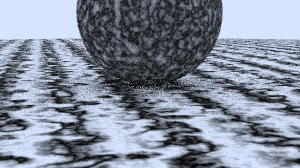

In [11]:
im::image res3 = actually_run_test(3);
res3

In [12]:
// im::image res5 = actually_run_test(5);
// res5

Done.
Time: 397

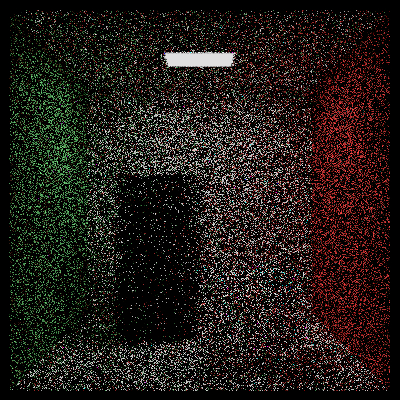

In [13]:
im::image res6 = actually_run_test(6);
res6

Organizing a new BVH Node.
Axis is 0.
Object span is 256.
Organizing a new BVH Node.
Axis is 1.
Object span is 128.
Organizing a new BVH Node.
Axis is 0.
Object span is 64.
Organizing a new BVH Node.
Axis is 1.
Object span is 32.
Organizing a new BVH Node.
Axis is 0.
Object span is 16.
Organizing a new BVH Node.
Axis is 0.
Object span is 8.
Organizing a new BVH Node.
Axis is 0.
Object span is 4.
Organizing a new BVH Node.
Axis is 2.
Object span is 2.

Organizing a new BVH Node.
Axis is 1.
Object span is 2.


Organizing a new BVH Node.
Axis is 2.
Object span is 4.
Organizing a new BVH Node.
Axis is 1.
Object span is 2.

Organizing a new BVH Node.
Axis is 2.
Object span is 2.



Organizing a new BVH Node.
Axis is 0.
Object span is 8.
Organizing a new BVH Node.
Axis is 1.
Object span is 4.
Organizing a new BVH Node.
Axis is 2.
Object span is 2.

Organizing a new BVH Node.
Axis is 2.
Object span is 2.


Organizing a new BVH Node.
Axis is 1.
Object span is 4.
Organizing a new BVH Node.
Axis

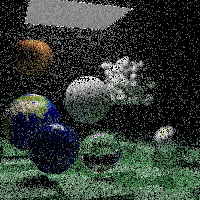

In [14]:
im::image res7 = actually_run_test(7);
res7